(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary'))

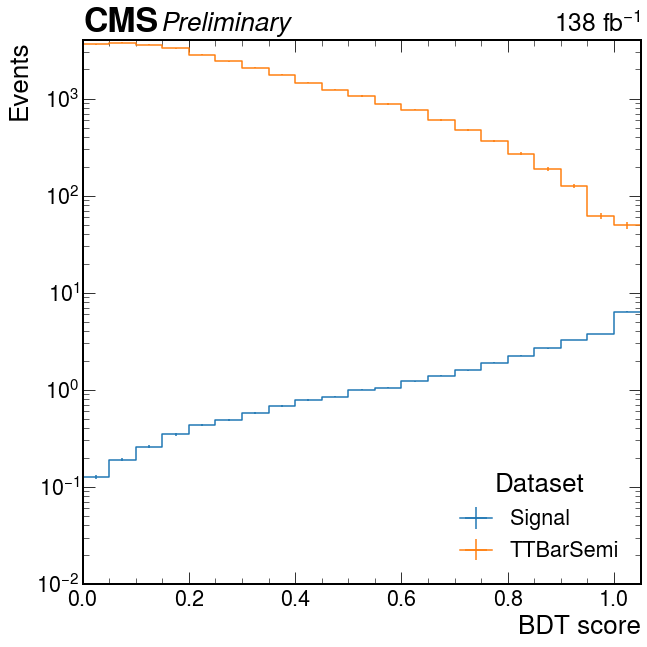

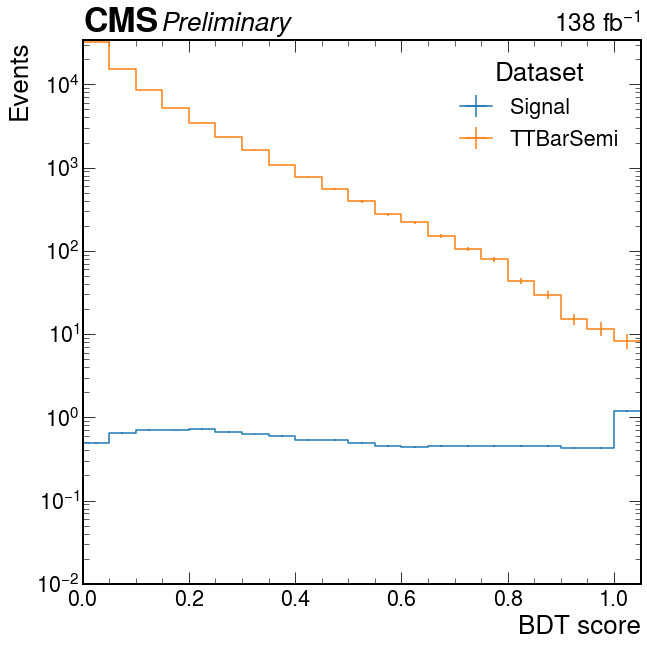

In [1]:
from math import sqrt
from coffea.util import load
from coffea import hist
import matplotlib.pyplot as plt
import mplhep as hep

f = load("outfile")

#lumi=35.9
lumi=138

for k in f.keys():
    if not hasattr(f[k],"scale"):
        continue  

#    f[k].scale({"TTBarSemi" : lumi*1000*365.4/f["sumw"]["TTBarSemi"],'W':lumi*1000*61526.7/f["sumw"]["W"],'TTBarHad':lumi*1000*377.96/f["sumw"]["TTBarHad"],"WW" : lumi*1000*64.3/f["sumw"]["WW"],'Signal':lumi*1000*0.0184/f["sumw"]["Signal"]},axis="dataset")
        
    f[k].scale({"TTBarSemi" : lumi*1000*365.4/f["sumw"]["TTBarSemi"],'Signal':lumi*1000*0.0184/f["sumw"]["Signal"]},axis="dataset")

    
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}    
    
plt.style.use(hep.style.CMS)                                                                                                                                          

nbins=5

for i in range(1,nbins+1):

    dcard = open("ewkwhjj_dcard_bin{}.txt".format(i),'w')

    print("imax 1 number of channels",file=dcard)
    print("jmax * number of background",file=dcard)
    print("kmax * number of nuisance parameters",file=dcard)

    print("Observation 0",file=dcard)
    dcard.write("bin")
    dcard.write(" bin1")
    dcard.write(" bin1")
    dcard.write('\n')

    dcard.write("process")
    dcard.write(" Signal")
    dcard.write(" TTBarSemi")
    dcard.write('\n')
    
    dcard.write("process")
    dcard.write(" 0")
    dcard.write(" 1")
    dcard.write('\n')
    
    dcard.write('rate')
    signal_values=f["sel3_bdtscore_binning1"]["Signal"].values(sumw2=True,overflow="over")[("Signal",)]
    ttbarsemi_values=f["sel3_bdtscore_binning1"]["TTBarSemi"].values(sumw2=True,overflow="over")[("TTBarSemi",)]
    dcard.write(" {}".format(signal_values[0][-i]))
    dcard.write(" {}".format(ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    dcard.write('mcstatsignalbin{} lnN {} -'.format(i,1+sqrt(signal_values[1][-i])/signal_values[0][-i]))
    dcard.write('\n')
    dcard.write('mcstatttbarsemibin{} lnN - {}'.format(i,1+sqrt(ttbarsemi_values[1][-i])/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_prefireUp_values=f["sel3_bdtscore_binning1_prefireUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_prefireUp_values=f["sel3_bdtscore_binning1_prefireUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('prefire lnN')
    dcard.write(' {}'.format(signal_prefireUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_prefireUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')

    signal_electronidsfUp_values=f["sel3_bdtscore_binning1_electronidsfUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_electronidsfUp_values=f["sel3_bdtscore_binning1_electronidsfUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('electronid lnN')
    dcard.write(' {}'.format(signal_electronidsfUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_electronidsfUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_muonidsfUp_values=f["sel3_bdtscore_binning1_muonidsfUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_muonidsfUp_values=f["sel3_bdtscore_binning1_muonidsfUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('muonid lnN')
    dcard.write(' {}'.format(signal_muonidsfUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_muonidsfUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_muonisosfUp_values=f["sel3_bdtscore_binning1_muonisosfUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_muonisosfUp_values=f["sel3_bdtscore_binning1_muonisosfUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('muoniso lnN')
    dcard.write(' {}'.format(signal_muonisosfUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_muonisosfUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_muonhltsfUp_values=f["sel3_bdtscore_binning1_muonhltsfUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_muonhltsfUp_values=f["sel3_bdtscore_binning1_muonhltsfUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('muonhlt lnN')
    dcard.write(' {}'.format(signal_muonhltsfUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_muonhltsfUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_JESUp_values=f["sel3_bdtscore_binning1_JESUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_JESUp_values=f["sel3_bdtscore_binning1_JESUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('jes lnN')
    dcard.write(' {}'.format(signal_JESUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_JESUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')
    
    signal_JERUp_values=f["sel3_bdtscore_binning1_JERUp"]["Signal"].values(overflow="over")[("Signal",)]
    ttbarsemi_JERUp_values=f["sel3_bdtscore_binning1_JERUp"]["TTBarSemi"].values(overflow="over")[("TTBarSemi",)]
    
    dcard.write('jer lnN')
    dcard.write(' {}'.format(signal_JERUp_values[-i]/signal_values[0][-i]))
    dcard.write(' {}'.format(ttbarsemi_JERUp_values[-i]/ttbarsemi_values[0][-i]))
    dcard.write('\n')    
    
    dcard.close()

nbins_merged = 2    
    
for i in range(1,nbins_merged+1):

    dcard_merged = open("ewkwhjj_merged_dcard_bin{}.txt".format(i),'w')

    print("imax 1 number of channels",file=dcard_merged)
    print("jmax * number of background",file=dcard_merged)
    print("kmax * number of nuisance parameters",file=dcard_merged)

    print("Observation 0",file=dcard_merged)
    dcard_merged.write("bin")
    dcard_merged.write(" bin1")
    dcard_merged.write(" bin1")
    dcard_merged.write('\n')

    dcard_merged.write("process")
    dcard_merged.write(" Signal")
    dcard_merged.write(" TTBarSemi")
    dcard_merged.write('\n')
    
    dcard_merged.write("process")
    dcard_merged.write(" 0")
    dcard_merged.write(" 1")
    dcard_merged.write('\n')
    
    dcard_merged.write('rate')
    signal_values=f["sel9_bdtscore_binning1"]["Signal"].values(sumw2=True,overflow="over")[("Signal",)]
    ttbarsemi_values=f["sel9_bdtscore_binning1"]["TTBarSemi"].values(sumw2=True,overflow="over")[("TTBarSemi",)]
    dcard_merged.write(" {}".format(signal_values[0][-i]))
    dcard_merged.write(" {}".format(ttbarsemi_values[0][-i]))
    dcard_merged.write('\n')
    
    dcard_merged.write('mcstatsignalbin{} lnN {} -'.format(i,1+sqrt(signal_values[1][-i])/signal_values[0][-i]))
    dcard_merged.write('\n')
    dcard_merged.write('mcstatttbarsemibin{} lnN - {}'.format(i,1+sqrt(ttbarsemi_values[1][-i])/ttbarsemi_values[0][-i]))
    dcard_merged.write('\n')
    
    dcard_merged.close()
    
bdtscorefig1, ax = plt.subplots()

hist.plot1d(f["sel3_bdtscore_binning1"].remove(["Data"],"dataset"),overflow="over")

ax.set_xlabel('BDT score')
ax.set_ylim(0.01, None)
ax.set_yscale('log')
                                                                                                                                                                         
hep.cms.lumitext("{} fb$^{{-1}}$".format(lumi))
hep.cms.text("Preliminary")

sel9bdtscorefig1, ax = plt.subplots()

hist.plot1d(f["sel9_bdtscore_binning1"].remove(["Data"],"dataset"),overflow="over")

ax.set_xlabel('BDT score')
ax.set_ylim(0.01, None)
ax.set_yscale('log')
                                                                                                                                                                         
hep.cms.lumitext("{} fb$^{{-1}}$".format(lumi))
hep.cms.text("Preliminary")